<a href="https://colab.research.google.com/github/rewpak/Life-Expectancy-Prediction/blob/main/DNN_Life_expectancy_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 10.0 MB/s eta 0:00:00


In [ ]:
# Download the splited data set (training, testing, validation)
training_df = pd.read_csv('/content/drive/MyDrive/DL/pc_train.csv')
testing_df = pd.read_csv('/content/drive/MyDrive/DL/pc_test.csv')
validation_df= pd.read_csv('/content/drive/MyDrive/DL/pc_valid.csv')

In [ ]:
X_train = training_df.drop(['Life.expectancy'], axis=1).values
y_train = training_df['Life.expectancy'].values

X_test = testing_df.drop(['Life.expectancy'], axis=1).values
y_test = testing_df['Life.expectancy'].values

X_validation = validation_df.drop(['Life.expectancy'], axis=1).values
y_validation = validation_df['Life.expectancy'].values

# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

In [ ]:
# Built the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(7,)),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error')

# EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=50,
    verbose=1,
    mode='min',
    restore_best_weights=True
)
start_time = time.time()
# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=500,
    batch_size=64,
    verbose=2,
    validation_data=(X_validation_scaled, y_validation),
    callbacks=[early_stopping]
)
end_time = time.time()

Epoch 1/500
109/109 - 3s - loss: 2765.9038 - val_loss: 201.9725 - 3s/epoch - 32ms/step
Epoch 2/500
109/109 - 0s - loss: 146.8058 - val_loss: 118.2242 - 329ms/epoch - 3ms/step
Epoch 3/500
109/109 - 0s - loss: 108.8376 - val_loss: 93.5580 - 430ms/epoch - 4ms/step
Epoch 4/500
109/109 - 1s - loss: 85.6825 - val_loss: 74.6011 - 515ms/epoch - 5ms/step
Epoch 5/500
109/109 - 0s - loss: 67.8865 - val_loss: 60.4473 - 422ms/epoch - 4ms/step
Epoch 6/500
109/109 - 1s - loss: 52.9152 - val_loss: 45.8358 - 715ms/epoch - 7ms/step
Epoch 7/500
109/109 - 1s - loss: 40.6081 - val_loss: 35.0048 - 623ms/epoch - 6ms/step
Epoch 8/500
109/109 - 1s - loss: 31.2020 - val_loss: 27.1347 - 612ms/epoch - 6ms/step
Epoch 9/500
109/109 - 1s - loss: 23.9236 - val_loss: 20.7926 - 686ms/epoch - 6ms/step
Epoch 10/500
109/109 - 1s - loss: 19.0172 - val_loss: 17.2326 - 747ms/epoch - 7ms/step
Epoch 11/500
109/109 - 1s - loss: 15.7771 - val_loss: 14.3376 - 710ms/epoch - 7ms/step
Epoch 12/500
109/109 - 1s - loss: 13.5683 - val_

In [ ]:
execution_time = end_time - start_time

# Print the execution time
print(f"Total execution time for training the model: {execution_time} seconds")

Total execution time for training the model: 125.43864154815674 seconds


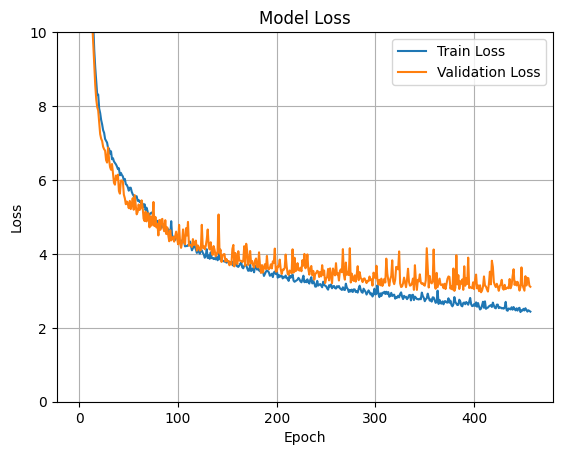

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.ylim([0, 10])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [ ]:
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Loss: ", loss)

Loss:  3.539743423461914


63/63 [==============================] - 0s 1ms/step


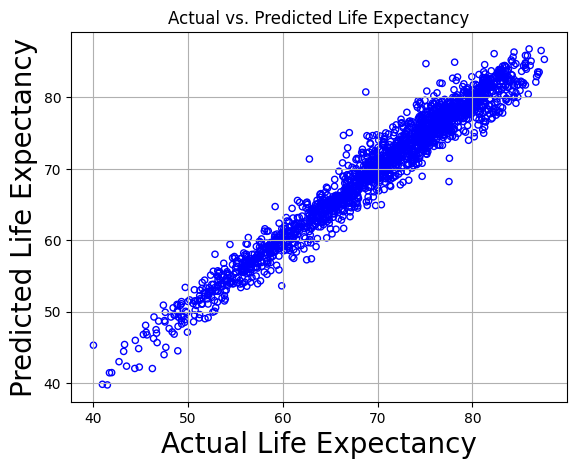

Execution time: 0.27736878395080566 seconds
MSE (Mean Squared Error): 3.5397436312085735
RMSE (Root Mean Squared Error): 1.881420641751486
MAE (Mean Absolute Error): 1.3787647875214393
R^2 (Coefficient of Determination): 0.9589078337578392


In [ ]:
start_time = time.time()
y_pred = model.predict(X_test_scaled).flatten()
end_time = time.time()

# Scatter plot
plt.scatter(y_test, y_pred, s=20, marker='o', edgecolor='blue', c='none')
plt.xlabel('Actual Life Expectancy', fontsize=20)
plt.ylabel('Predicted Life Expectancy', fontsize=20)
plt.title('Actual vs. Predicted Life Expectancy')
plt.grid(True)
plt.show()

# Evaluation
prediction_time = end_time - start_time
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Execution time:", prediction_time, "seconds")
print(f"MSE (Mean Squared Error): {mse}")
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"MAE (Mean Absolute Error): {mae}")
print(f"R^2 (Coefficient of Determination): {r2}")

In [ ]:
explainer = shap.Explainer(model, X_train_scaled)

# Calculate SHAP values for training data
shap_values_train = explainer(X_train_scaled)

# Plot the SHAP summary plot for training data
shap.summary_plot(shap_values_train, X_train_scaled, feature_names=["PC1","PC2","PC3","PC4","PC5","PC6","PC7"], show=False)

# Show plot
plt.show()

ExactExplainer explainer:  72%|███████▏  | 4995/6950 [02:17<01:09, 28.15it/s]